In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline

In [2]:
# Data
m = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

m.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [3]:
m.shape

(2553, 14)

# Train Test Split

In [5]:
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
              "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size = 0.2)

In [6]:
X_train.shape

(2042, 10)

In [7]:
X_test.shape

(511, 10)

In [8]:
X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
811,0.869,7,-4.586,1,0.2540,0.07890,0.000000,0.351,0.922,210546
190,0.475,0,-11.762,1,0.0264,0.12900,0.020900,0.196,0.489,181866
529,0.899,0,-4.237,1,0.1430,0.00496,0.000047,0.372,0.760,236093
442,0.657,11,-4.901,1,0.0376,0.08270,0.000032,0.173,0.659,263453
1354,0.755,7,-6.928,0,0.0837,0.01780,0.000000,0.243,0.360,224800


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# predictions
y_pred = model.predict(X_test)
y_pred[1:10]

array([0.53974814, 0.57488321, 0.41787186, 0.68382761, 0.69597713,
       0.61102808, 0.58338931, 0.48807034, 0.80031569])

In [11]:
 #testing R2
model.score(X_test,y_test)

0.35423262422724977

In [12]:
 #training R2
    
model.score(X_train, y_train)

0.3614882408234634

In [14]:
# make pred df for ggplot
true_vs_pred = pd.DataFrame({"predict": y_pred, "true": y_test})
true_vs_pred.head()

,predict,true
885,0.663313,0.447
724,0.539748,0.368
2026,0.574883,0.527
560,0.417872,0.352
177,0.683828,0.532


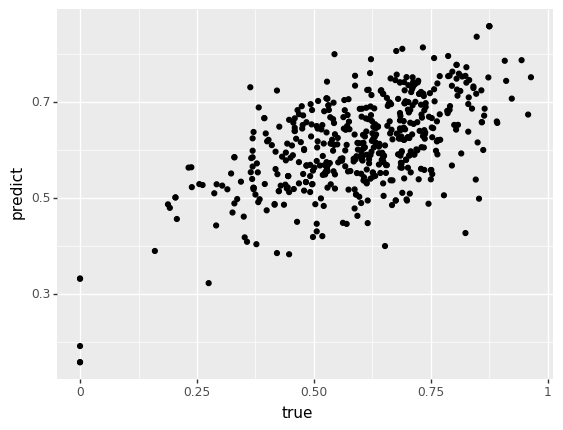

<ggplot: (311991031)>

In [15]:
# ggplot
(ggplot(true_vs_pred, aes(x = "true", y = "predict")) + geom_point())

# K Fold

In [17]:
kf = KFold(n_splits = 10)

In [18]:
x = m[predictors]
y = m["danceability"]

model = LinearRegression()

In [19]:
mse = cross_val_score(model, x, y, cv = kf, scoring = "neg_mean_squared_error")

In [20]:
mse

array([-0.02093031, -0.02398416, -0.01761189, -0.01403148, -0.01796454,
       -0.0212833 , -0.02109307, -0.00763517, -0.01173777, -0.01199926])

In [21]:
np.mean(mse)

-0.016827095268677806

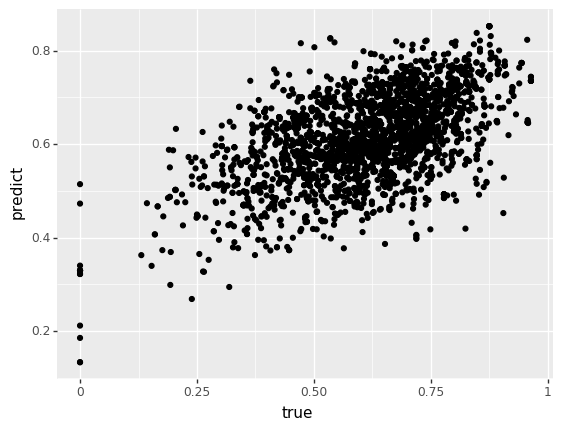

<ggplot: (317106502)>

In [22]:
y_pred = cross_val_predict(model, x, y, cv = kf)
true_vs_pred = pd.DataFrame({"predict": y_pred, "true": y})
true_vs_pred.head()
(ggplot(true_vs_pred, aes(x = "true", y = "predict")) + geom_point())

In [23]:
r2_score(y, y_pred)

0.3121168054907405

# Leave One Out

In [24]:
loo = LeaveOneOut()

In [26]:
mse = cross_val_score(model, x, y, cv = loo, scoring = "neg_mean_squared_error")

In [27]:
np.mean(mse)

-0.01577326185227478

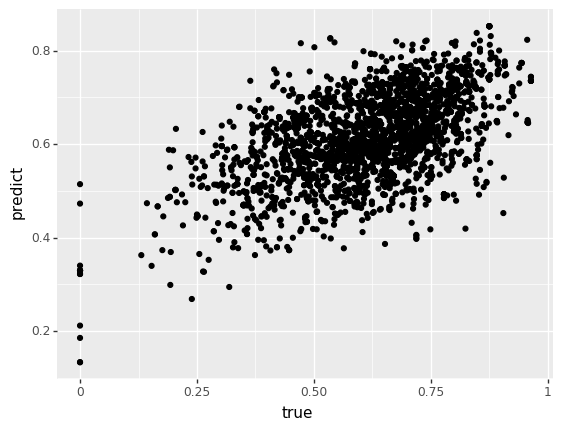

<ggplot: (312156974)>

In [28]:
y_pred = cross_val_predict(model, x, y, cv = kf)
true_vs_pred = pd.DataFrame({"predict": y_pred, "true": y})
true_vs_pred.head()
(ggplot(true_vs_pred, aes(x = "true", y = "predict")) + geom_point())

In [29]:
r2_score(y, y_pred)

0.3121168054907405

# Quick Note about Data Leakage...

In [30]:
# Say you want to standardize...

X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
811,0.869,7,-4.586,1,0.2540,0.07890,0.000000,0.351,0.922,210546
190,0.475,0,-11.762,1,0.0264,0.12900,0.020900,0.196,0.489,181866
529,0.899,0,-4.237,1,0.1430,0.00496,0.000047,0.372,0.760,236093
442,0.657,11,-4.901,1,0.0376,0.08270,0.000032,0.173,0.659,263453
1354,0.755,7,-6.928,0,0.0837,0.01780,0.000000,0.243,0.360,224800


In [31]:
zscore = StandardScaler()

In [33]:
zscore.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
Xz_train = zscore.transform(X_train)

array([[ 1.22387412,  0.53180998,  0.77330135, ...,  0.72022095,
         2.04345664, -0.0902508 ],
       [-0.68618965, -1.52938628, -1.30715144, ..., -0.10414171,
         0.0769062 , -0.52331524],
       [ 1.36931045, -1.52938628,  0.87448279, ...,  0.83190879,
         1.30770336,  0.29550574],
       ...,
       [ 0.80695665,  0.23735337,  0.8156294 , ..., -0.54025615,
        -0.1320114 ,  0.22061035],
       [-1.42791493,  1.12072319,  0.3752437 , ..., -0.59875931,
        -1.41730881,  0.24255047],
       [ 0.58395428, -0.94047307,  0.42713905, ...,  1.42225883,
        -1.47180905, -0.56378291]])

In [10]:
# DO NOT REFIT, I REPEAT DO NOT REFIT
Xz_test = zscore.transform(X_test)